Analysis of solar radiance at one point using the NASA POWER API

The NASA POWER API is part of a NASA data package called Prediction Of Worldwide Energy Resources,
available to optimize the use of renewable energy, increasing energy efficiency and supplying agricultural needs.

Let's analyze the solar irradiation at a specific point in the city of Belo Horizonte.
This study is valid to verify the efficiency of a possible solar power plant in one location.

In [1]:
#We first import libraries that may be useful
import json
import numpy as np
import pandas as pd
import csv
import requests
import datetime as dt
from pandas.io.json import json_normalize
variavel = ["ALLSKY_SFC_SW_DWN"]
import matplotlib.pyplot as plt
from pandas import *
import sqlite3
from sqlite3 import Error

In [2]:
# Below we create a function to collect the API data when Latitude and Longitude of the point are provided.
# On-site daily irradiance has been provided since 1983.
#The function also performs basic data cleaning
def nasapower_regional(latitude, longitude):
        """Query the NASA Power server for data on given latitude/longitude
        """

        start_date = dt.date(1983,7,1)
        end_date = dt.date.today()

        # build URL for retrieving data
        server = "https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py"
        payload = {"request": "execute",
                   "identifier": "SinglePoint",
                   "parameters": ",".join(variavel),
                   "lat": latitude,
                   "lon": longitude,
                   "startDate": start_date.strftime("%Y%m%d"),
                   "endDate": end_date.strftime("%Y%m%d"),
                   "userCommunity": "SSE",
                   "tempAverage": "DAILY",
                   "outputList": "JSON",
                   "user": "anonymous"
                   }
        msg = "Starting retrieval from NASA Power"

        req = requests.get(server, params=payload)
        req = req.json()

        
        dados = req ['features'][0]['properties']['parameter']
        idx = Int64Index([171])

        df = DataFrame(dados, index = idx)
        data = pd.DataFrame(dados)
        datas = data.reset_index()
        
        datas['index'] = pd.to_datetime(datas['index'])
        
        datas['year'] = datas['index'].dt.year
        datas['month'] = datas['index'].dt.month
        datas['day'] = datas['index'].dt.day
        
        df = datas[datas.ALLSKY_SFC_SW_DWN != -999]
        
        df = df.rename(index=str, columns={"ALLSKY_SFC_SW_DWN": "Irradiação"})
        df = df.drop(['index'], axis=1)
        
        return df

In [3]:
#Call the function
Dados_nasa = nasapower_regional(-19.85,-43.9)

Dados_nasa

,Irradiação,year,month,day
0,3.91,1983,7,1
1,4.47,1983,7,2
2,4.20,1983,7,3
3,4.29,1983,7,4
4,4.54,1983,7,5
5,4.88,1983,7,6
6,4.79,1983,7,7
7,4.77,1983,7,8
8,5.12,1983,7,9
9,5.23,1983,7,10


In [4]:
# We created a database in SQL to receive the API data
conn = sqlite3.connect('nasapower.db') 
c = conn.cursor() 


In [5]:
import sqlite3
from sqlite3 import Error

conn = sqlite3.connect('nasapower.db')
try:
    print(sqlite3.version)
except Error as e:
    print(e)
finally:
    conn.close()
        
if __name__ == '__main__':
    create_connection = r'C:\\Users\Samsung\Desktop\Solarview\Solarview\nasapower.db'



2.6.0


In [6]:
#Insert data
conn = sqlite3.connect(r'C:\\Users\Samsung\Desktop\Solarview\Solarview\nasapower.db')
Dados_nasa.to_sql("Dados_nasa", conn, if_exists="replace")

In [7]:
#Check the data
pd.read_sql_query("select * from Dados_nasa;", conn)

,index,Irradiação,year,month,day
0,0,3.91,1983,7,1
1,1,4.47,1983,7,2
2,2,4.20,1983,7,3
3,3,4.29,1983,7,4
4,4,4.54,1983,7,5
5,5,4.88,1983,7,6
6,6,4.79,1983,7,7
7,7,4.77,1983,7,8
8,8,5.12,1983,7,9
9,9,5.23,1983,7,10


Let's look at the data.

First we will make a copy of the dataframe, then we will work with the averages of radiation per day, month and year.

In [8]:
df = Dados_nasa

In [9]:
m = df.groupby('month')['Irradiação'].mean()
d = df.groupby('day')['Irradiação'].mean()
y = df.groupby('year')['Irradiação'].mean()
i = df.groupby('month')['day','Irradiação'].mean()

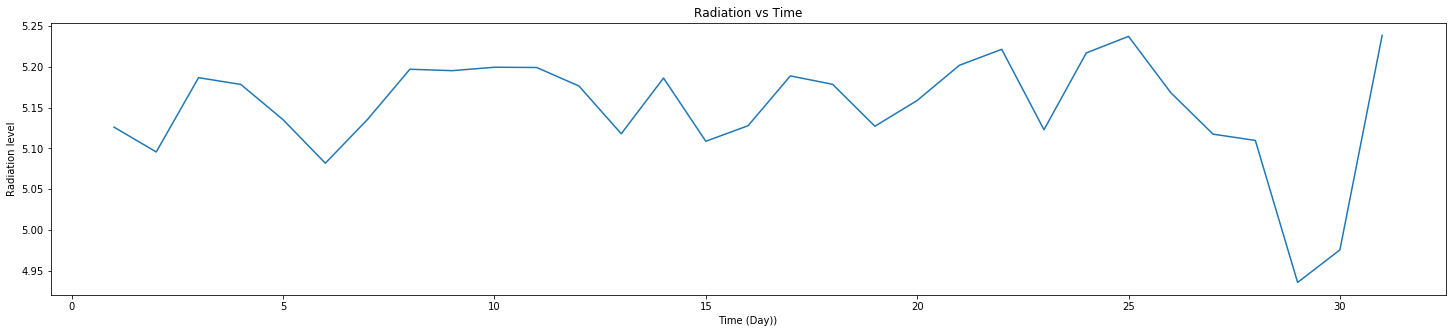

In [10]:

plt.figure(figsize= (25,5))
plt.title('Radiation vs Time')
plt.xlabel('Time (Day))')
plt.ylabel('Radiation level')
plt.plot(d)



The visualization of the radiation per day is not very efficient, because the days are a very short space of time, then we suffer action of the seasons and rainy periods.

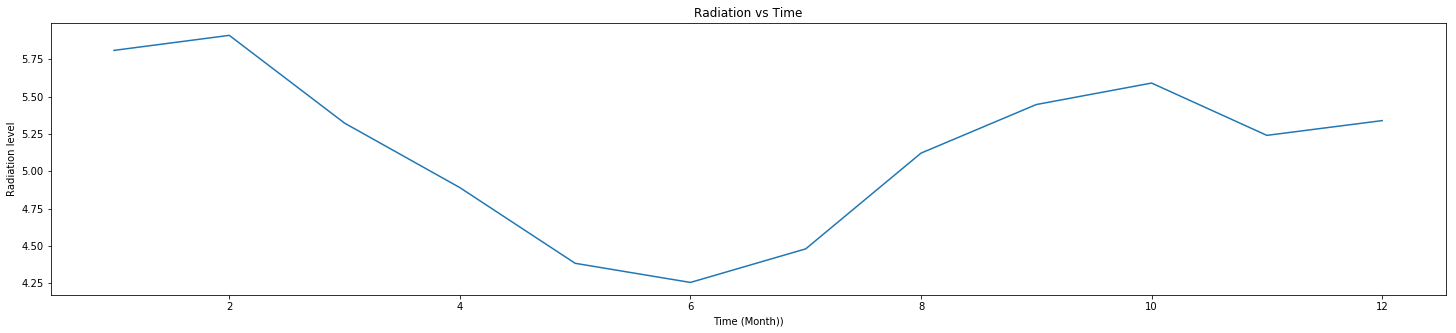

In [11]:
plt.figure(figsize= (25,5))
plt.title('Radiation vs Time')
plt.xlabel('Time (Month))')
plt.ylabel('Radiation level')
plt.plot(m)



Analyzing the irradiance per month, we can notice that the period from April to July has the lowest incidence of solar radiation, coinciding with winter. This allows a forecast of the months that will have a higher power generation.

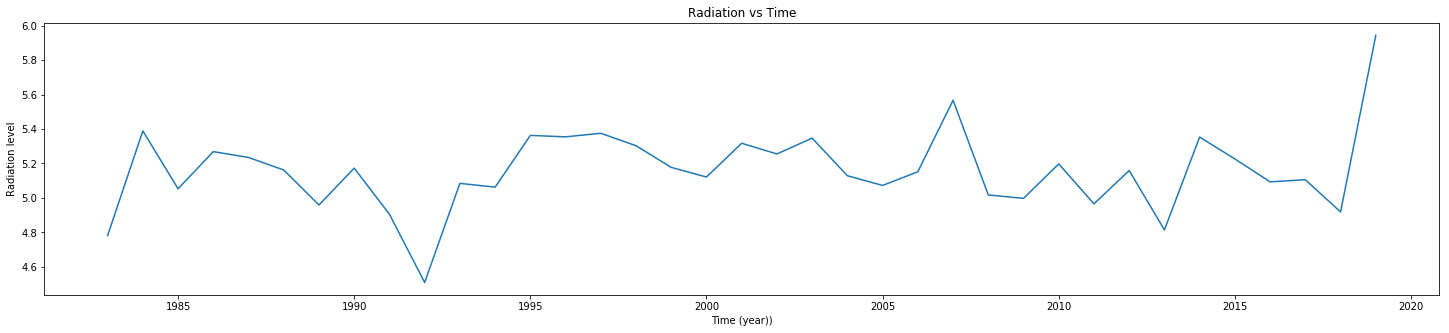

In [12]:
plt.figure(figsize= (25,5))
plt.title('Radiation vs Time')
plt.xlabel('Time (year))')
plt.ylabel('Radiation level')
plt.plot(y)

The yearly view does not interfere with our analysis, just by demonstrating that radiation always follows a constant average, with little warmer or colder years.
